In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [39]:
df = pd.read_csv("Cleaned (Final Data).csv")
df.head()

,ear,mar,target
0,0.18,0.48,1
1,0.33,0.46,0
2,0.40,0.40,0
3,0.36,0.44,0
4,0.46,0.39,0


C:\Users\Susant\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Susant\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


<Figure size 800x640 with 0 Axes>

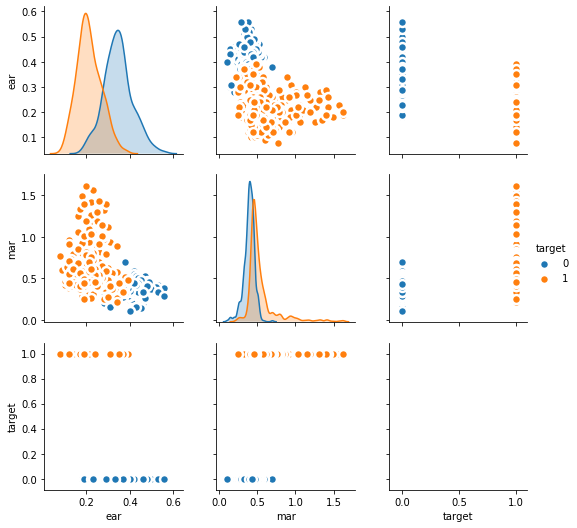

In [40]:
# Load Dataset
#df = sns.load_dataset('iris')

# Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, kind="scatter", hue="target", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

<Figure size 800x640 with 0 Axes>

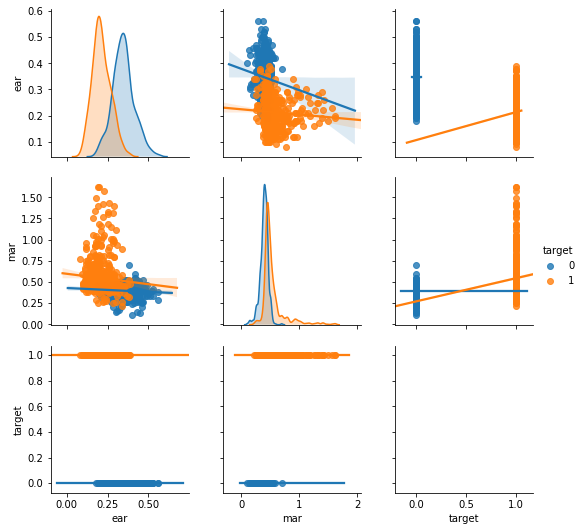

In [41]:
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, kind="reg", hue="target")
plt.show()

### Classification

In [42]:
model= ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'KNN', 'SVM']
accuracies = []

In [43]:
# Logistic Regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score




In [44]:
x = df.drop('target', axis =1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions_log = logmodel.predict(X_test)
accuracy_score(y_test,predictions_log)

C:\Users\Susant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8753709198813057

In [45]:
accuracies.append(100*accuracy_score(y_test,predictions_log))

In [46]:
# Decision Tree

from sklearn import tree
model_dt = tree.DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

predictions_dt = model_dt.predict(X_test)
accuracy_score(y_test,predictions_dt)



0.8486646884272997

In [47]:
accuracies.append(100*accuracy_score(y_test,predictions_dt))

In [48]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators = 100)
model_rf.fit(X_train, y_train)

predictions_rf = model_rf.predict(X_test)
accuracy_score(y_test,predictions_rf)



0.8694362017804155

In [49]:
accuracies.append(100*accuracy_score(y_test,predictions_rf))

In [50]:
accuracies

[87.53709198813057, 84.86646884272997, 86.94362017804154]

In [51]:
# Navie Bayes

from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
predictions_nb = model_nb.predict(X_test)
accuracy_score(y_test, predictions_nb)

0.8694362017804155

In [52]:
accuracies.append(100*accuracy_score(y_test,predictions_nb))

In [53]:
# KNN 

# Model
from sklearn.neighbors import KNeighborsClassifier
index = []
acc_score = []
print(type(acc_score))

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    predictions_knn = knn.predict(X_test)
    index.append(i)
    acc_score.append(accuracy_score(y_test, predictions_knn))
    #acc_score[i]= accuracy_score(y_test, predictions_knn)
    #score = cross_val_score(knn, df_feat, df['TARGET CLASS'], cv=10)
    #accuracy_rate.append(score.mean())

data = {'n':index, 'accuracy': acc_score}
df_knn_n = pd.DataFrame(data)

<class 'list'>


In [54]:
df_knn_n.head(20)

,n,accuracy
0,1,0.845697
1,2,0.872404
2,3,0.875371
3,4,0.881306
4,5,0.872404
5,6,0.893175
6,7,0.890208
7,8,0.884273
8,9,0.890208
9,10,0.875371


In [55]:
df_knn_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 2 columns):
n           39 non-null int64
accuracy    39 non-null float64
dtypes: float64(1), int64(1)
memory usage: 752.0 bytes


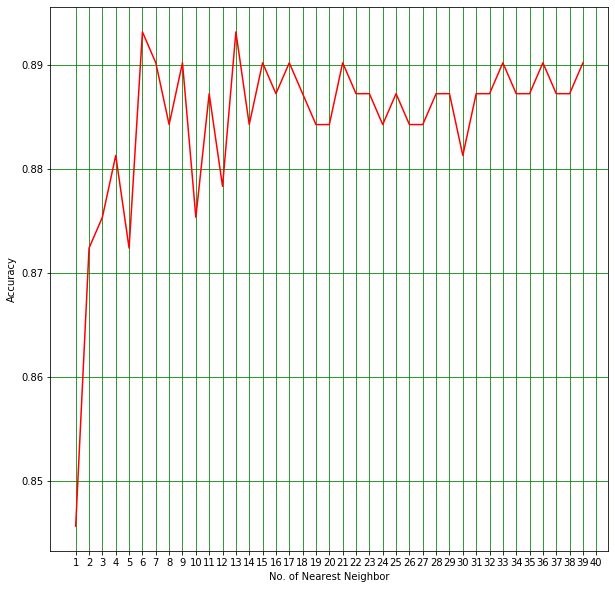

<Figure size 432x288 with 0 Axes>

In [56]:
import numpy as np
plt.figure(figsize=(10,10))
plt.plot(df_knn_n['n'],df_knn_n['accuracy'], color='r')
plt.xticks(np.arange(1,41,1))
plt.xlabel('No. of Nearest Neighbor')
plt.ylabel('Accuracy')
plt.grid(axis='both', color='g')
plt.show()
plt.savefig('n in knn.jpg', bbox_inches='tight')

In [57]:
model_knn = KNeighborsClassifier(n_neighbors = 6) # k=1

#Fitting
model_knn.fit(X_train,y_train)
predictions_knn = model_knn.predict(X_test)
accuracy_score(y_test, predictions_knn)


0.8931750741839762

In [58]:
accuracies.append(100*accuracy_score(y_test,predictions_knn))

In [59]:
# SVM

from sklearn.svm import SVC
model_svm = SVC()
model_svm.fit(X_train, y_train)
predictions_svm = model_svm.predict(X_test)
accuracy_score(y_test, predictions_svm)

C:\Users\Susant\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8753709198813057

In [60]:
accuracies.append(100*accuracy_score(y_test,predictions_svm))

In [61]:
accuracies

[87.53709198813057,
 84.86646884272997,
 86.94362017804154,
 86.94362017804154,
 89.31750741839762,
 87.53709198813057]

In [62]:
dict_total = {'model': model, 'accuracy': accuracies}
df_total = pd.DataFrame(dict_total)
df_total.head(10)

,model,accuracy
0,Logistic Regression,87.537092
1,Decision Tree,84.866469
2,Random Forest,86.943620
3,Naive Bayes,86.943620
4,KNN,89.317507
5,SVM,87.537092


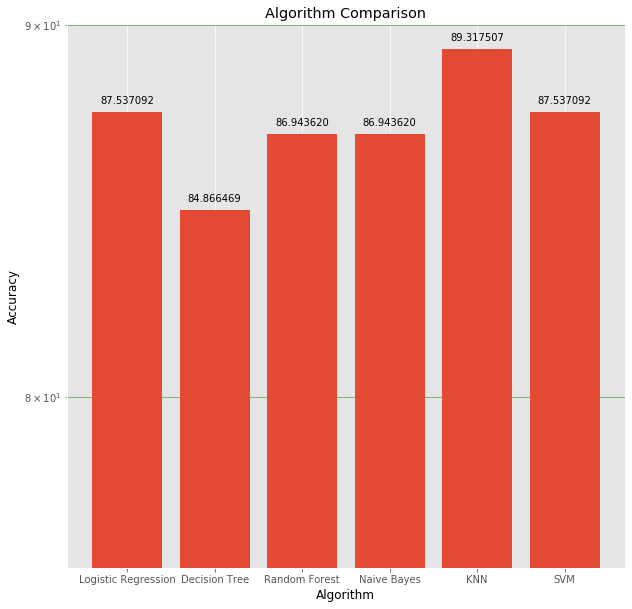

In [75]:
plt.figure(figsize=(10,10))

plt.semilogy()
plot = plt.bar(df_total['model'],df_total['accuracy']) #, marker='o', color='r')
plt.style.use('ggplot')

# for printing height 
for value in plot:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             1.002*height,'%f' % float(height), ha='center', va='bottom', color='black')

plt.title('Algorithm Comparison', color='black')
#plt.yticks(np.arange(0.8,0.9,100))
plt.xlabel('Algorithm', color='black')
plt.ylabel('Accuracy', color='black')
plt.grid(axis='y', which='both', alpha=0.6, color='green')
#(df_total['model'],df_total['accuracy'], marker='o', color='r')
plt.savefig('Model Comparison.jpg',bbox_inches='tight')
plt.show()

In [29]:
# Since KNN achieved the maximum accuracy, So saving KNN model
import pickle  
#KNN_saved = pickle.dumps(model_knn,'wb') 
filename = 'knn_model.sav'
pickle.dump(model_knn, open(filename, 'wb')) 

### Clustering

In [ ]:
# K-Means Clustering

In [ ]:
# Fuzzy Means Clustering

In [ ]:
# Hierarchical Clustering